In [9]:
import pandas as pd

tp = pd.read_csv(r"D:\tips.csv.csv")
print(tp.head())



   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


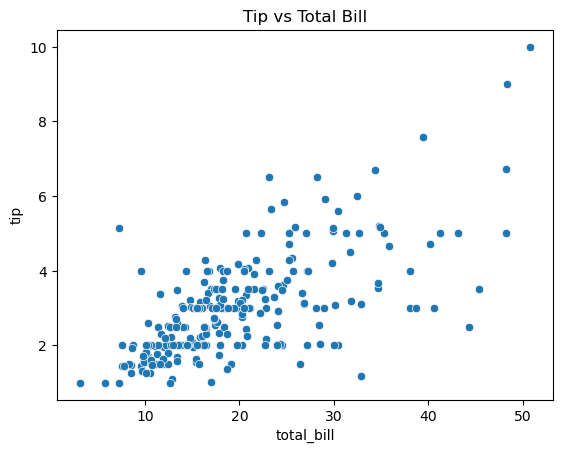

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=tp, x="total_bill", y="tip")
plt.title("Tip vs Total Bill")
plt.show()

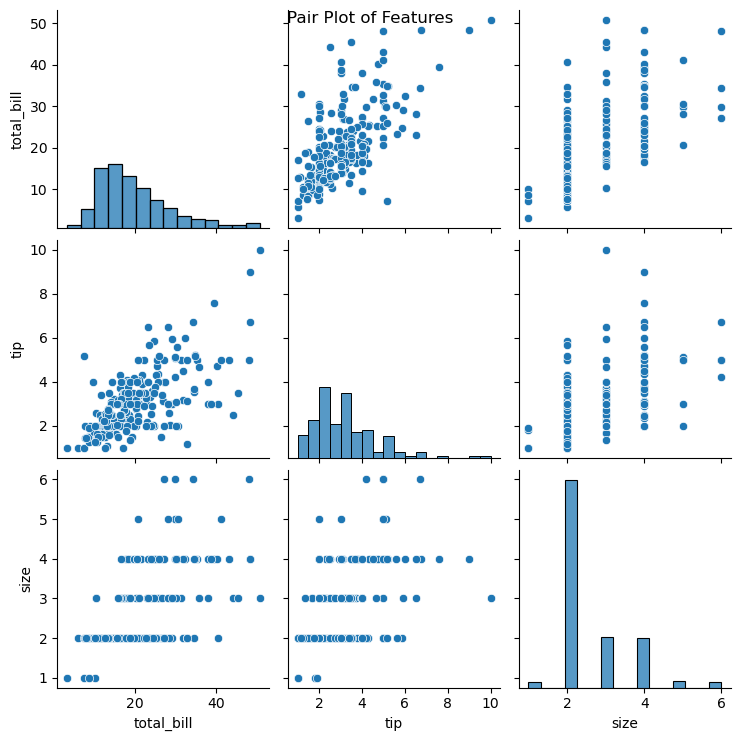

In [14]:
sns.pairplot(tp)
plt.suptitle("Pair Plot of Features")
plt.show()

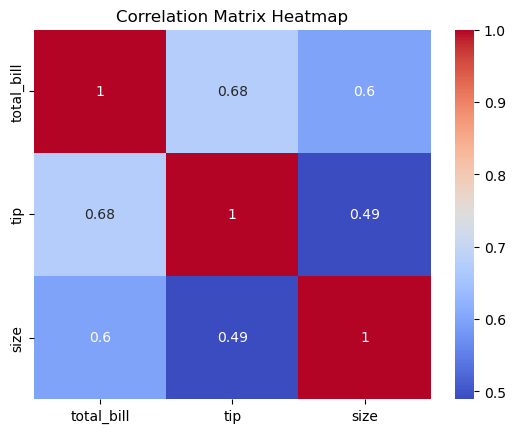

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

tp_numeric = tp.select_dtypes(include=['number'])
correlation_matrix = tp_numeric.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()


In [ ]:
from statsmodels.api import OLS, add_constant
from statsmodels.stats.diagnostic import linear_r
X = add_constant(tp['total_bill']) 
y = tp['tip']
model = OLS(y, X).fit()

rainbow_statistic, rainbow_p_value = linear_rainbow(model)
print("Rainbow Test:", rainbow_statistic, rainbow_p_value)


Rainbow Test: 1.2291480226129026 0.1291192152551375


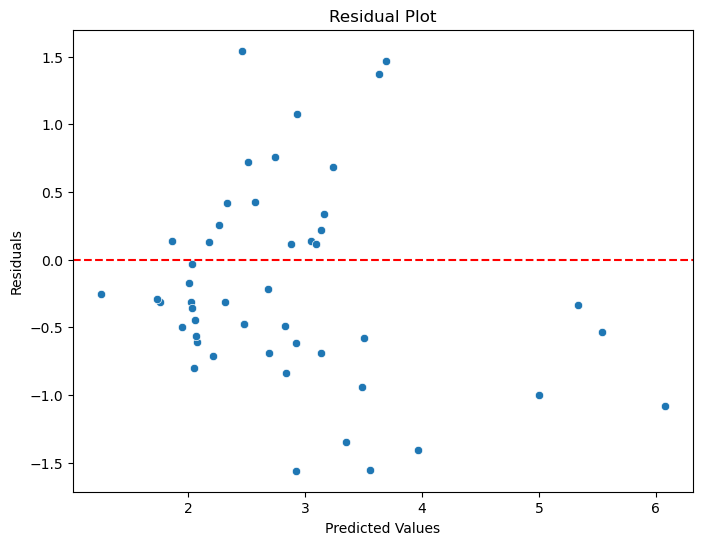

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = tp[['total_bill']]
y = tp['tip']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

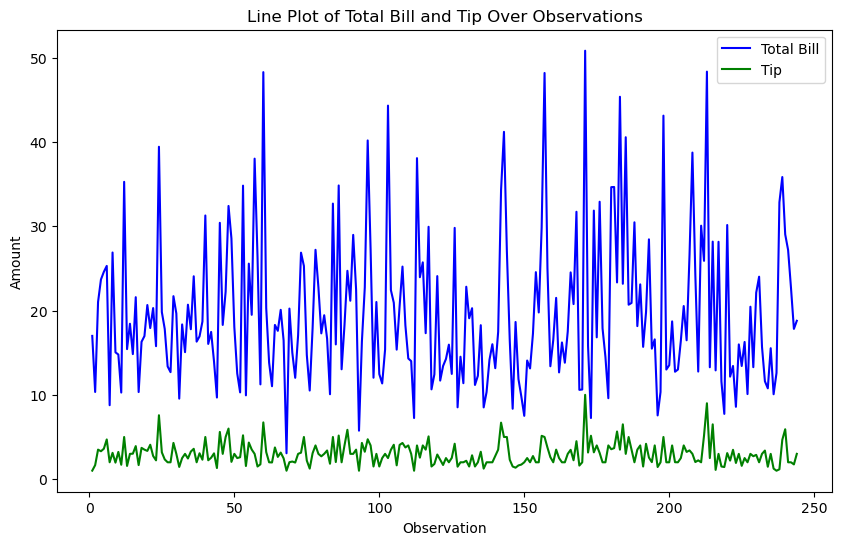

In [31]:
tp['Observation'] = range(1, len(tp) + 1)

plt.figure(figsize=(10, 6))
plt.plot(tp['Observation'], tp['total_bill'], label="Total Bill", color='blue')
plt.plot(tp['Observation'], tp['tip'], label="Tip", color='green')
plt.xlabel("Observation")
plt.ylabel("Amount")
plt.title("Line Plot of Total Bill and Tip Over Observations")
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X = tp[['total_bill']]
y = tp['tip']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

MAE: 0.6208580000398983
MSE: 0.5688142529229538
R-squared: 0.5449381659234664


In [ ]:
from sklearn.linear_model import Ridge, Lasso

ridge_reg = Ridge(alpha=1)
ridge_reg.fit(X_train, y_train)
print("Ridge R-squared:", ridge_reg.score(X_test, y_test))

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)
print("Lasso R-squared:", lasso_reg.score(X_test, y_test))

Ridge R-squared: 0.544945834233854
Lasso R-squared: 0.5462147597181777


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
print("Decision Tree R-squared:", tree.score(X_test, y_test))

rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
print("Random Forest R-squared:", rf.score(X_test, y_test))

Decision Tree R-squared: -0.06898287247700985
Random Forest R-squared: 0.27595293899094564


In [ ]:
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)
print("SVR R-squared:", svr.score(X_test, y_test))

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
print("KNN R-squared:", knn.score(X_test, y_test))

SVR R-squared: 0.5125471659009395
KNN R-squared: 0.4545453410143979
